# Algoritmos Genéticos

In [1]:
%pip install mealpy --quiet

Note: you may need to restart the kernel to use updated packages.


## Parte 1
Adapte o código pro algoritmo genético para representar a solução em formato binário.

In [2]:
from mealpy import FloatVar
from mealpy.evolutionary_based.GA import BaseGA
import numpy as np

values = np.array([3, 6, 16, 9, 7, 8, 5, 11, 13, 14])
weights = np.array([8, 4, 7, 2, 6, 10, 3, 5, 11, 9])
W = 30
n = len(values)


def ativacao(solution):
    x = np.round(solution)
    total_values = np.dot(x, values)
    total_weights = np.dot(x, weights)

    penalty = 100 * max(0, total_weights - W)

    return -total_values + penalty


problem_dict = {
    "obj_func": ativacao,
    "bounds": FloatVar(lb=[0] * n, ub=[1] * n, name="delta"),
    "minmax": "min",
    "save_population": True,
}

## Parte 2
Execute o algoritmo e colete as soluções com as configurações com a seleção de indivíduos por torneio.

### Experimento 1: Exploração Inicial

In [ ]:
model = BaseGA(pop_size=200, epoch=100, pm=0.05, pc=0.7)
ag_best = model.solve(problem_dict)

In [4]:
print(f"Solution: {np.round(ag_best.solution)}, Fitness: {ag_best.target.fitness}")

Solution: [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.], Fitness: -61.0


### Experimento 2: Exploração e Intensificação Equilibrada

In [ ]:
model = BaseGA(pop_size=150, epoch=75, pm=0.02, pc=0.85)
ag_best = model.solve(problem_dict)

In [6]:
print(f"Solution: {np.round(ag_best.solution)}, Fitness: {ag_best.target.fitness}")

Solution: [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.], Fitness: -61.0


### Experimento 3:

In [ ]:
model = BaseGA(pop_size=300, epoch=150, pm=0.1, pc=0.9)
ag_best = model.solve(problem_dict)

In [8]:
print(f"Solution: {np.round(ag_best.solution)}, Fitness: {ag_best.target.fitness}")

Solution: [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.], Fitness: -61.0


## Parte 3
Repita os experimentos anteriores considerando agora preservar para a próxima geração 5% do tamanho da população (elitismo). No que essa característica o resultado final?

In [9]:
import numpy as np
from mealpy.evolutionary_based.GA import EliteSingleGA

elitism = 0.05

In [ ]:
model = EliteSingleGA(pop_size=200, epoch=100, pm=0.05, pc=0.7, elitism=elitism)
ag_best = model.solve(problem_dict)

In [11]:
print(f"Solution: {np.round(ag_best.solution)}, Fitness: {ag_best.target.fitness}")

Solution: [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.], Fitness: -61.0


In [ ]:
model = EliteSingleGA(pop_size=150, epoch=75, pm=0.02, pc=0.85, elitism=elitism)
ag_best = model.solve(problem_dict)

In [13]:
print(f"Solution: {np.round(ag_best.solution)}, Fitness: {ag_best.target.fitness}")

Solution: [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.], Fitness: -61.0


In [ ]:
model = EliteSingleGA(pop_size=300, epoch=150, pm=0.1, pc=0.9, elitism=elitism)
ag_best = model.solve(problem_dict)

In [15]:
print(f"Solution: {np.round(ag_best.solution)}, Fitness: {ag_best.target.fitness}")

Solution: [0. 1. 1. 1. 0. 0. 1. 1. 0. 1.], Fitness: -61.0


## Parte 4
Analise a evolução das soluções ao lingo das gerações por meio de gráficos.

In [16]:
import matplotlib.pyplot as plt


def run_experiment_with_history(
    model_class, params, problem_dict, experiment_name="Experimento"
):
    model = model_class(**params)
    best_agent = model.solve(problem_dict)

    # Converter os fitness negativos para valores positivos para melhor visualização
    # Lembre-se que na função objetivo o sinal foi invertido (minimização)
    fitness_history = [-fit for fit in model.history.list_global_best_fit]

    print(f"{experiment_name}:")
    print(f"Melhor solução: {np.round(best_agent.solution)}")
    print(f"Melhor fitness: {-best_agent.target.fitness}")
    print(f"Total de valor: {np.dot(np.round(best_agent.solution), values)}")
    print(f"Total de peso: {np.dot(np.round(best_agent.solution), weights)}")
    print("\n")

    return model, fitness_history


exp1_params = {"pop_size": 200, "epoch": 100, "pm": 0.05, "pc": 0.7}
exp2_params = {"pop_size": 150, "epoch": 75, "pm": 0.02, "pc": 0.85}
exp3_params = {"pop_size": 300, "epoch": 150, "pm": 0.1, "pc": 0.9}

exp1_elite_params = {
    "pop_size": 200,
    "epoch": 100,
    "pm": 0.05,
    "pc": 0.7,
    "elitism": elitism,
}
exp2_elite_params = {
    "pop_size": 150,
    "epoch": 75,
    "pm": 0.02,
    "pc": 0.85,
    "elitism": elitism,
}
exp3_elite_params = {
    "pop_size": 300,
    "epoch": 150,
    "pm": 0.1,
    "pc": 0.9,
    "elitism": elitism,
}

Executando experimentos sem elitismo

In [ ]:
_, fit_history1 = run_experiment_with_history(
    BaseGA, exp1_params, problem_dict, "Experimento 1 - Sem Elitismo"
)
_, fit_history2 = run_experiment_with_history(
    BaseGA, exp2_params, problem_dict, "Experimento 2 - Sem Elitismo"
)
_, fit_history3 = run_experiment_with_history(
    BaseGA, exp3_params, problem_dict, "Experimento 3 - Sem Elitismo"
)

Executando experimentos com elitismo

In [ ]:
_, fit_history1_elite = run_experiment_with_history(
    EliteSingleGA, exp1_elite_params, problem_dict, "Experimento 1 - Com Elitismo"
)
_, fit_history2_elite = run_experiment_with_history(
    EliteSingleGA, exp2_elite_params, problem_dict, "Experimento 2 - Com Elitismo"
)
_, fit_history3_elite = run_experiment_with_history(
    EliteSingleGA, exp3_elite_params, problem_dict, "Experimento 3 - Com Elitismo"
)

Plotando a evolução das soluções - Comparação Sem Elitismo

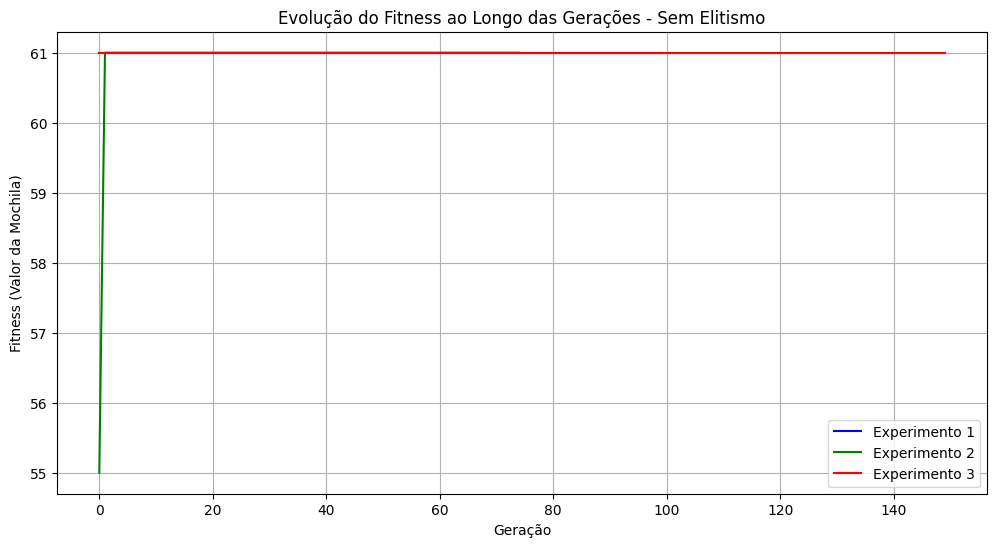

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(fit_history1, label="Experimento 1", color="blue")
plt.plot(fit_history2, label="Experimento 2", color="green")
plt.plot(fit_history3, label="Experimento 3", color="red")
plt.xlabel("Geração")
plt.ylabel("Fitness (Valor da Mochila)")
plt.title("Evolução do Fitness ao Longo das Gerações - Sem Elitismo")
plt.legend()
plt.grid(True)
plt.show()

Comparação Com Elitismo

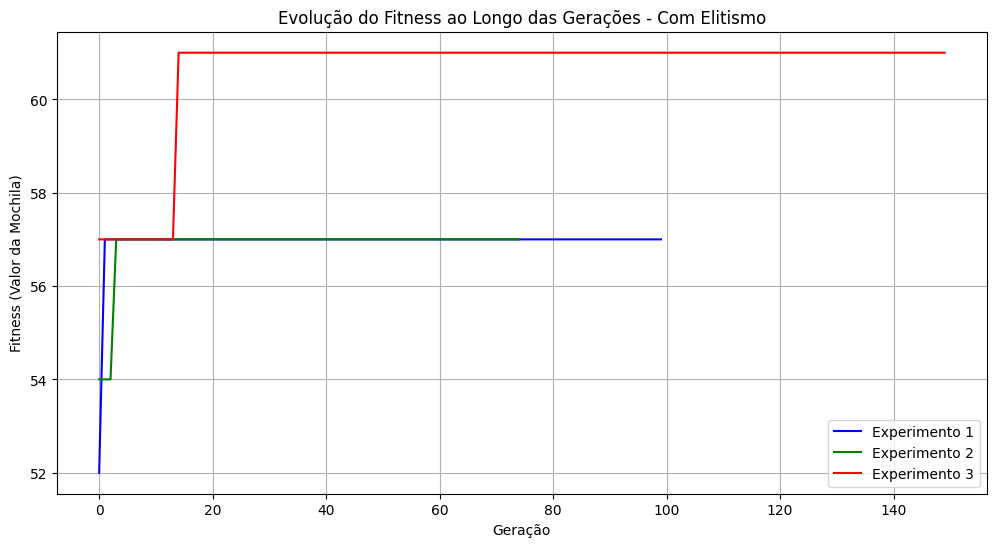

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(fit_history1_elite, label="Experimento 1", color="blue")
plt.plot(fit_history2_elite, label="Experimento 2", color="green")
plt.plot(fit_history3_elite, label="Experimento 3", color="red")
plt.xlabel("Geração")
plt.ylabel("Fitness (Valor da Mochila)")
plt.title("Evolução do Fitness ao Longo das Gerações - Com Elitismo")
plt.legend()
plt.grid(True)
plt.show()

Comparando a evolução com e sem elitismo para cada experimento

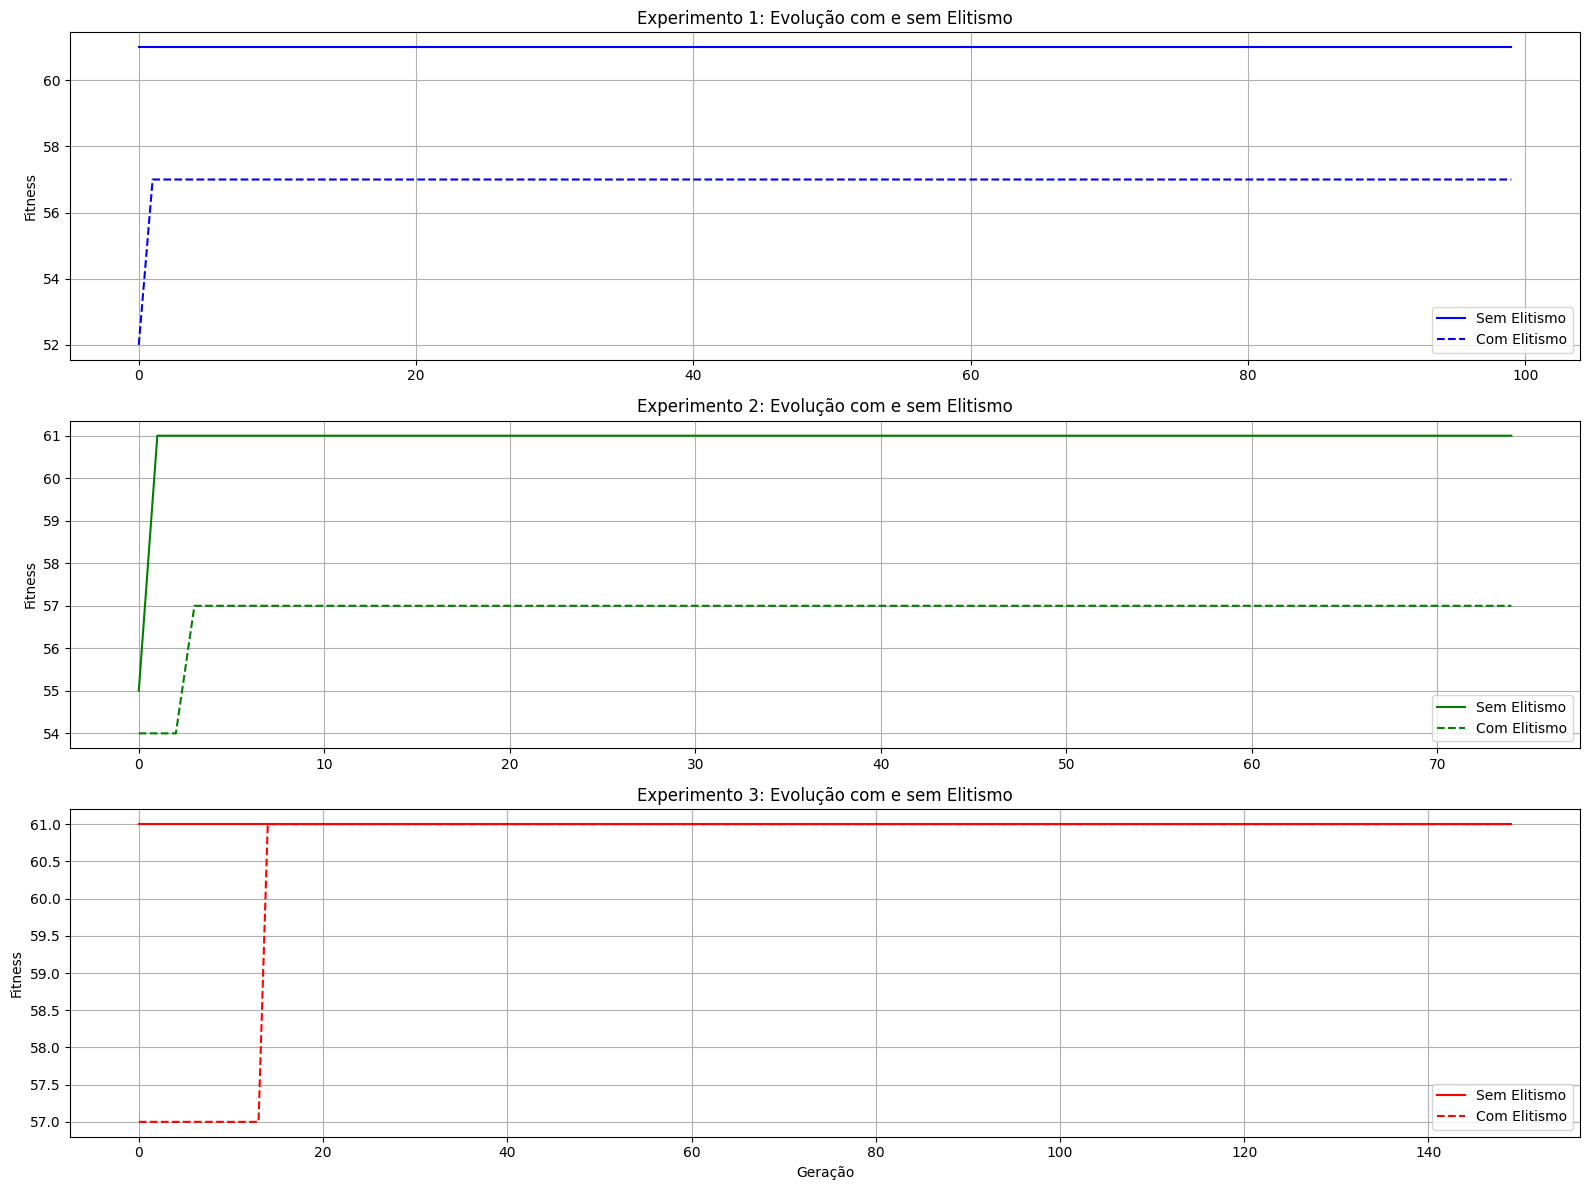

In [21]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.plot(fit_history1, label="Sem Elitismo", color="blue")
plt.plot(fit_history1_elite, label="Com Elitismo", color="blue", linestyle="--")
plt.title("Experimento 1: Evolução com e sem Elitismo")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(fit_history2, label="Sem Elitismo", color="green")
plt.plot(fit_history2_elite, label="Com Elitismo", color="green", linestyle="--")
plt.title("Experimento 2: Evolução com e sem Elitismo")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(fit_history3, label="Sem Elitismo", color="red")
plt.plot(fit_history3_elite, label="Com Elitismo", color="red", linestyle="--")
plt.title("Experimento 3: Evolução com e sem Elitismo")
plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Parte 5
Repita cada experimento pelo menos 5 vezes e apresente os resultados estatísticos entre essas 5 execuções.

In [22]:
import pandas as pd
from time import time


def run_multiple_experiments(model_class, params, problem_dict, num_runs=5):
    """Executa um experimento múltiplas vezes e retorna estatísticas"""
    fitness_values = []
    solution_values = []
    solution_weights = []
    execution_times = []
    history_data = []

    for i in range(num_runs):
        start_time = time()
        model = model_class(**params)
        best_agent = model.solve(problem_dict)
        end_time = time()

        # Lembre-se que na função objetivo o sinal foi invertido (minimização)
        fitness = -best_agent.target.fitness
        solution = np.round(best_agent.solution)
        total_value = np.dot(solution, values)
        total_weight = np.dot(solution, weights)

        fitness_values.append(fitness)
        solution_values.append(total_value)
        solution_weights.append(total_weight)
        execution_times.append(end_time - start_time)
        history_data.append([-fit for fit in model.history.list_global_best_fit])

    # Calcular estatísticas
    stats = {
        "média_fitness": np.mean(fitness_values),
        "desvio_padrão_fitness": np.std(fitness_values),
        "melhor_fitness": np.max(fitness_values),
        "pior_fitness": np.min(fitness_values),
        "média_valor": np.mean(solution_values),
        "desvio_padrão_valor": np.std(solution_values),
        "média_peso": np.mean(solution_weights),
        "desvio_padrão_peso": np.std(solution_weights),
        "tempo_médio": np.mean(execution_times),
        "fitness_values": fitness_values,
        "history_data": history_data,
    }

    return stats

Execução de múltiplos experimentos sem elitismo

In [ ]:
print("Executando múltiplos experimentos sem elitismo...")
stats_exp1 = run_multiple_experiments(BaseGA, exp1_params, problem_dict)
stats_exp2 = run_multiple_experiments(BaseGA, exp2_params, problem_dict)
stats_exp3 = run_multiple_experiments(BaseGA, exp3_params, problem_dict)

Execução de múltiplos experimentos com elitismo

In [ ]:
print("Executando múltiplos experimentos com elitismo...")
stats_exp1_elite = run_multiple_experiments(
    EliteSingleGA, exp1_elite_params, problem_dict
)
stats_exp2_elite = run_multiple_experiments(
    EliteSingleGA, exp2_elite_params, problem_dict
)
stats_exp3_elite = run_multiple_experiments(
    EliteSingleGA, exp3_elite_params, problem_dict
)

Criar tabela comparativa

In [25]:
comparison_data = [
    {
        "Experimento": "Exp 1 - Sem Elitismo",
        **{
            k: v
            for k, v in stats_exp1.items()
            if k not in ["fitness_values", "history_data"]
        },
    },
    {
        "Experimento": "Exp 2 - Sem Elitismo",
        **{
            k: v
            for k, v in stats_exp2.items()
            if k not in ["fitness_values", "history_data"]
        },
    },
    {
        "Experimento": "Exp 3 - Sem Elitismo",
        **{
            k: v
            for k, v in stats_exp3.items()
            if k not in ["fitness_values", "history_data"]
        },
    },
    {
        "Experimento": "Exp 1 - Com Elitismo",
        **{
            k: v
            for k, v in stats_exp1_elite.items()
            if k not in ["fitness_values", "history_data"]
        },
    },
    {
        "Experimento": "Exp 2 - Com Elitismo",
        **{
            k: v
            for k, v in stats_exp2_elite.items()
            if k not in ["fitness_values", "history_data"]
        },
    },
    {
        "Experimento": "Exp 3 - Com Elitismo",
        **{
            k: v
            for k, v in stats_exp3_elite.items()
            if k not in ["fitness_values", "history_data"]
        },
    },
]

df_comparison = pd.DataFrame(comparison_data)
df_comparison

,Experimento,média_fitness,desvio_padrão_fitness,melhor_fitness,pior_fitness,média_valor,desvio_padrão_valor,média_peso,desvio_padrão_peso,tempo_médio
0,Exp 1 - Sem Elitismo,61.0,0.000000,61.0,61.0,61.0,0.000000,30.0,0.000000,1.261907
1,Exp 2 - Sem Elitismo,61.0,0.000000,61.0,61.0,61.0,0.000000,30.0,0.000000,0.702276
2,Exp 3 - Sem Elitismo,61.0,0.000000,61.0,61.0,61.0,0.000000,30.0,0.000000,3.249353
3,Exp 1 - Com Elitismo,61.0,0.000000,61.0,61.0,61.0,0.000000,30.0,0.000000,1.836469
4,Exp 2 - Com Elitismo,59.4,1.959592,61.0,57.0,59.4,1.959592,29.6,0.489898,0.990116
5,Exp 3 - Com Elitismo,60.2,1.600000,61.0,57.0,60.2,1.600000,29.8,0.400000,4.675463


Plotar gráfico de barras comparando o fitness médio

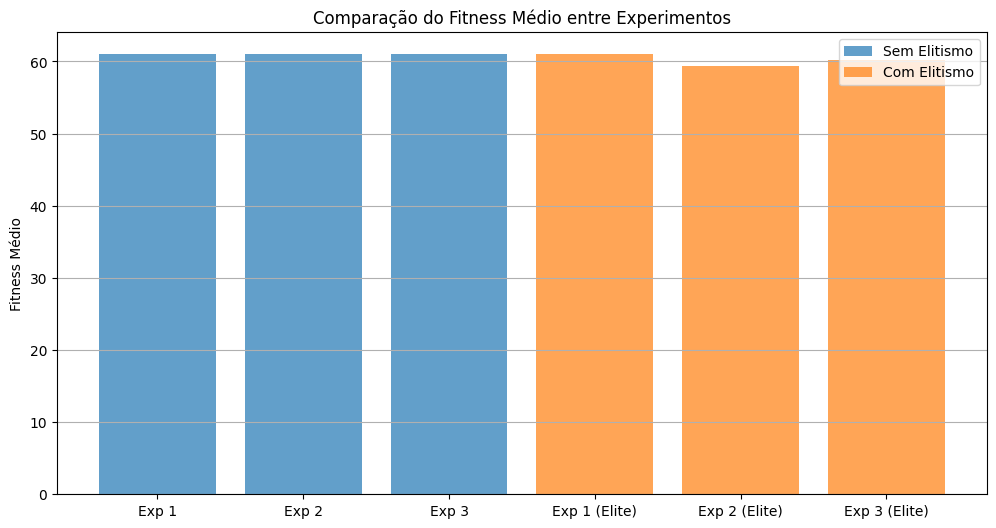

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(
    ["Exp 1", "Exp 2", "Exp 3"],
    [
        stats_exp1["média_fitness"],
        stats_exp2["média_fitness"],
        stats_exp3["média_fitness"],
    ],
    alpha=0.7,
    label="Sem Elitismo",
)
plt.bar(
    ["Exp 1 (Elite)", "Exp 2 (Elite)", "Exp 3 (Elite)"],
    [
        stats_exp1_elite["média_fitness"],
        stats_exp2_elite["média_fitness"],
        stats_exp3_elite["média_fitness"],
    ],
    alpha=0.7,
    label="Com Elitismo",
)
plt.ylabel("Fitness Médio")
plt.title("Comparação do Fitness Médio entre Experimentos")
plt.legend()
plt.grid(axis="y")
plt.show()

Plotar curvas de convergência médias

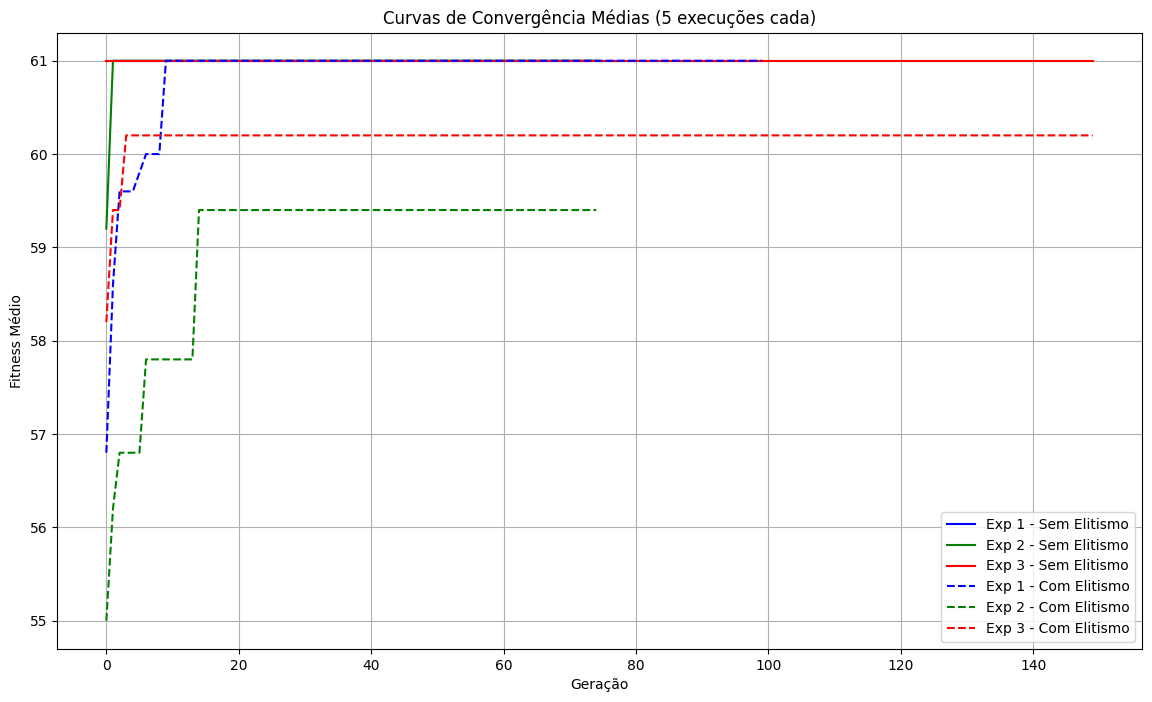

In [27]:
plt.figure(figsize=(14, 8))


def calc_avg_convergence(history_data):
    # Encontrar o menor comprimento entre todos os históricos
    min_length = min(len(hist) for hist in history_data)
    # Truncar todos os históricos para o mesmo comprimento
    truncated_data = [hist[:min_length] for hist in history_data]
    # Calcular a média para cada geração
    return np.mean(truncated_data, axis=0)


avg_conv_exp1 = calc_avg_convergence(stats_exp1["history_data"])
avg_conv_exp2 = calc_avg_convergence(stats_exp2["history_data"])
avg_conv_exp3 = calc_avg_convergence(stats_exp3["history_data"])
avg_conv_exp1_elite = calc_avg_convergence(stats_exp1_elite["history_data"])
avg_conv_exp2_elite = calc_avg_convergence(stats_exp2_elite["history_data"])
avg_conv_exp3_elite = calc_avg_convergence(stats_exp3_elite["history_data"])

plt.plot(avg_conv_exp1, label="Exp 1 - Sem Elitismo", color="blue")
plt.plot(avg_conv_exp2, label="Exp 2 - Sem Elitismo", color="green")
plt.plot(avg_conv_exp3, label="Exp 3 - Sem Elitismo", color="red")
plt.plot(
    avg_conv_exp1_elite, label="Exp 1 - Com Elitismo", color="blue", linestyle="--"
)
plt.plot(
    avg_conv_exp2_elite, label="Exp 2 - Com Elitismo", color="green", linestyle="--"
)
plt.plot(avg_conv_exp3_elite, label="Exp 3 - Com Elitismo", color="red", linestyle="--")

plt.xlabel("Geração")
plt.ylabel("Fitness Médio")
plt.title("Curvas de Convergência Médias (5 execuções cada)")
plt.legend()
plt.grid(True)
plt.show()